In [15]:
from pybrain.datasets import UnsupervisedDataSet,SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import TanhLayer,SigmoidLayer,LinearLayer

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
x=np.arange(300)/10
y=(x+3)**2+50

In [43]:
dsCalib=SupervisedDataSet(1,1)

for p1,res in zip(x,y):
    dsCalib.addSample((p1),(res,))

In [44]:
#Crear la red
net=buildNetwork(1,2,1,bias=False,hiddenclass=TanhLayer)

net.reset

trainer=BackpropTrainer(net,dsCalib)

In [45]:
iters=500
errors,activacion=[],[]
PesosEvol,BiasEvol=np.zeros((iters,4)),np.zeros((iters,3))
for j in range (iters):
    errors.append(trainer.train())
    activacion.append(net.activateOnDataset(dsCalib))
    Pesos,Bias=[],[]
    for i in net.modules:
        if i.name!="bias":
            for c in net.connections[i]:
                Pesos.append(c.params)
        else:
            for c in net.connections[i]:
                Bias.append(c.params)
    Pesos=np.array(Pesos).reshape(4)
#     Bias =np.array(np.concatenate(Bias,axis=0)).reshape(3)
    PesosEvol[j,:]=Pesos
#     BiasEvol[j,:]=Bias
    

In [37]:
for mod in net.modules:
    print("Module",mod.name)
    if mod.paramdim>0:
        print("--parameters:",mod.params)
    for conn in net.connections[mod]:
        print("--connection to",conn.outmod.name)
        if conn.paramdim>0:
            print("-parameters",conn.params)

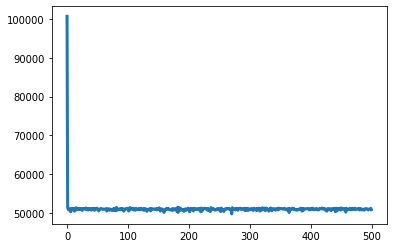

In [49]:
plt.plot(errors,lw=3)

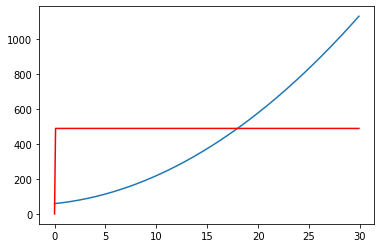

In [46]:
net_sim=net.activateOnDataset(dsCalib)
plt.plot(x,y)
plt.plot(x,net_sim,c='r')

## Reescalamiento

Es importante el reescalamiento porque a veces la red no podrá captar fluctuaciones muy grandes

In [64]:
x_esc=5*((x/np.max(abs(x))*2)-1)
y_esc=5*((y/np.max(abs(y))*2)-1)

In [65]:
dsCalib2=SupervisedDataSet(1,1)

for p1,res in zip(x_esc,y_esc):
    dsCalib2.addSample((p1),(res,))

In [72]:
#Crear la red
net2=buildNetwork(1,2,1,bias=True,hiddenclass=TanhLayer)

net2.reset

trainer2=BackpropTrainer(net2,dsCalib2)

In [73]:
iters=500
errors,activacion=[],[]
PesosEvol,BiasEvol=np.zeros((iters,4)),np.zeros((iters,3))
for j in range (iters):
    errors.append(trainer2.train())
    activacion.append(net2.activateOnDataset(dsCalib))
    Pesos,Bias=[],[]
    for i in net2.modules:
        if i.name!="bias":
            for c in net2.connections[i]:
                Pesos.append(c.params)
        else:
            for c in net2.connections[i]:
                Bias.append(c.params)
    Pesos=np.array(Pesos).reshape(4)
    Bias =np.array(np.concatenate(Bias,axis=0)).reshape(3)
    PesosEvol[j,:]=Pesos
    BiasEvol[j,:]=Bias
    

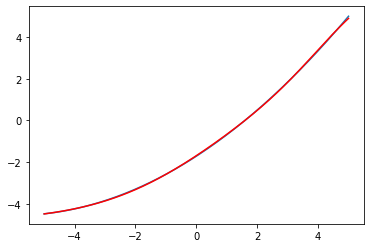

In [74]:
net_sim2=net2.activateOnDataset(dsCalib2)
plt.plot(x_esc,y_esc)
plt.plot(x_esc,net_sim2,c='r')

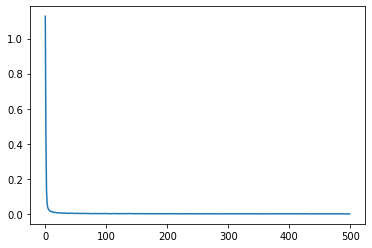

In [76]:
plt.plot(errors)